In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import flopy

In [2]:
# Load the vertex data from the CSV file
vertex_file = r"C:\Users\betebari\Documents\SacUSG\Behrooz_efforts\VertexID.csv"
vertex_df = pd.read_csv(vertex_file)

# Ensure the VertexID is an integer, and X and Y coordinates are floats
vertices = vertex_df[['VertexID', 'X', 'Y']].to_numpy(dtype=np.float64)
vertices[:, 0] = vertices[:, 0].astype(int)  # Convert VertexID to int


In [3]:
vertices = vertex_df[['VertexID', 'X', 'Y']].to_numpy(dtype=np.float64)

# Ensure the VertexID is treated as an integer
vertices[:, 0] = vertices[:, 0].astype(int)

# Print the first few entries of the vertices array to confirm
print(vertices[:5])

[[1.00000000e+00 5.66804081e+05 4.45873459e+06]
 [2.00000000e+00 5.67080698e+05 4.45923159e+06]
 [3.00000000e+00 5.67299884e+05 4.45874093e+06]
 [4.00000000e+00 5.66589684e+05 4.45919988e+06]
 [5.00000000e+00 5.67002168e+05 4.45825746e+06]]


In [4]:
# Create the MODFLOW 6 simulation object
sim = flopy.mf6.MFSimulation(sim_name='SacMF6', version='mf6', exe_name='mf6.exe', sim_ws='.')

# Create the groundwater flow (GWF) model object
gwf = flopy.mf6.ModflowGwf(sim, modelname='SacMF6', save_flows=True)

# Print the simulation and model objects to verify they were created successfully
print(sim)
print(gwf)


sim_name = SacMF6
sim_path = C:\Users\betebari\Documents\_Jupyter\SacFEM_2_flopy
exe_name = mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = SacMF6


@@@@@@@@@@@@@@@@@@@@
Model SacMF6
@@@@@@@@@@@@@@@@@@@@

name = SacMF6
model_type = gwf6
version = mf6
model_relative_path = .



name = SacMF6
model_type = gwf6
version = mf6
model_relative_path = .




C:\Users\betebari\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


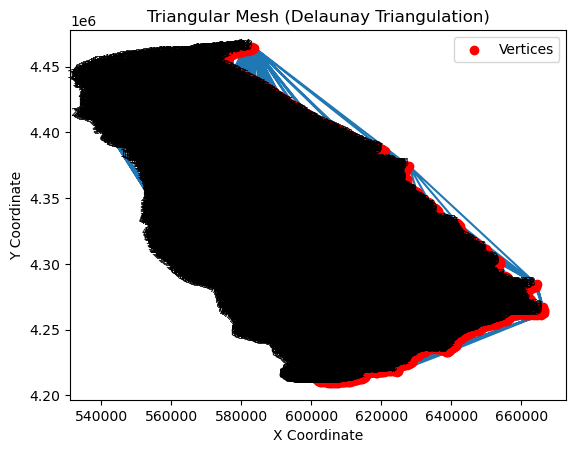

In [5]:
# Extract the X and Y coordinates
normalized_points = vertex_df[['X', 'Y']].to_numpy(dtype=np.float64)

# Perform Delaunay triangulation
tri = Delaunay(normalized_points)

# Plot the triangulation
plt.triplot(normalized_points[:, 0], normalized_points[:, 1], tri.simplices)
plt.scatter(normalized_points[:, 0], normalized_points[:, 1], color='red', label='Vertices')

# Add labels to the vertices for clarity (using VertexID)
for i, (x, y) in enumerate(normalized_points):
    vertex_id = int(vertex_df.iloc[i]['VertexID'])
    plt.text(x, y, str(vertex_id), fontsize=8, ha='right')

plt.title('Triangular Mesh (Delaunay Triangulation)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# 1. Define the Discretization (DIS) Package:

In [7]:
# Load the node data from the CSV or dataframe
node_file = r'C:/Users/betebari/Documents/SacUSG/Behrooz_efforts/SacFEM_node_strata.csv'
node_df = pd.read_csv(node_file)

# Extract the necessary columns: NodeID, X, Y, GSE, and L1_bgs to L7_bgs (top and bottom elevations)
nodes = node_df[['NodeID', 'X', 'Y', 'GSE', 'L1_bgs', 'L2_bgs', 'L3_bgs', 'L4_bgs', 'L5_bgs', 'L6_bgs', 'L7_bgs']].to_numpy()

# Check the data
print(nodes[:5])


[[ 1.00000000e+00  5.66804081e+05  4.45873459e+06  1.11830000e+02
   9.18300000e+01  4.75700000e+01  3.31000000e+00 -4.09500000e+01
  -1.06478900e+02 -1.88843800e+02 -3.40685300e+02]
 [ 2.00000000e+00  5.67080698e+05  4.45923159e+06  1.08387000e+02
   8.83870000e+01  4.05702000e+01 -7.24660000e+00 -5.50634000e+01
  -1.23214900e+02 -2.04546600e+02 -3.38706700e+02]
 [ 3.00000000e+00  5.67299884e+05  4.45874093e+06  1.10286000e+02
   9.02860000e+01  4.45495000e+01 -1.18700000e+00 -4.69235000e+01
  -1.12781300e+02 -1.93743700e+02 -3.34537000e+02]
 [ 4.00000000e+00  5.66589684e+05  4.45919988e+06  1.10750000e+02
   9.07500000e+01  4.44959000e+01 -1.75820000e+00 -4.80123000e+01
  -1.15839400e+02 -1.98652700e+02 -3.44251400e+02]
 [ 5.00000000e+00  5.67002168e+05  4.45825746e+06  1.19945000e+02
   9.99450000e+01  5.68413000e+01  1.37376000e+01 -2.93661000e+01
  -9.27359000e+01 -1.73980800e+02 -3.26536400e+02]]


# Step 2: Create the Simulation and Groundwater Flow Model

In [8]:
# Create the MODFLOW 6 simulation object
sim = flopy.mf6.MFSimulation(sim_name='SacMF6', version='mf6', exe_name='mf6.exe', sim_ws='.')

# Create the groundwater flow (GWF) model object
gwf = flopy.mf6.ModflowGwf(sim, modelname='SacMF6', save_flows=True)


# Step 3: Define the Unstructured Grid (DISU Package)

In [9]:
# Extract coordinates (X, Y), top elevations (GSE), and bottom elevations for each layer (L1_bgs to L7_bgs)
x = nodes[:, 1]
y = nodes[:, 2]
top = nodes[:, 3]  # Top elevations (GSE)
botm = nodes[:, 4:11]  # Bottom elevations for layers L1 to L7 (L1_bgs to L7_bgs)

# Set up the number of nodes and layers
nnodes = nodes.shape[0]
nlay = 7  # Number of layers (based on the data)

# Create the DISU package using node information
disu = flopy.mf6.ModflowGwfdisu(
    gwf,
    nodes=nnodes,              # Number of nodes
    nlay=nlay,                 # Number of layers
    top=top,                   # Top elevations (GSE)
    botm=botm,                 # Bottom elevations for each layer
    xorigin=0.0,               # Optional: x-origin for coordinates
    yorigin=0.0,               # Optional: y-origin for coordinates
    idomain=np.ones(nnodes, dtype=np.int32),  # Define all nodes as active
    length_units='FEET'      # Set units
)


FlopyException: Extraneous kwargs "nlay, botm" provided to MFPackage. ()

# Step 4: Set Up Initial Conditions (IC) Package

In [ ]:
# Set initial conditions (use the top elevation as an example)
strt = top

# Create the initial conditions package
ic = flopy.mf6.ModflowGwfic(gwf, strt=strt)


# Step 5: Define Hydraulic Properties (NPF Package)

# Step 6: Boundary Conditions (CHD Package as an Example)

# Step 7: Define Solver (IMS Package)

In [ ]:
# Create the solver package
ims = flopy.mf6.ModflowIms(sim, print_option='ALL', complexity='SIMPLE')

# Step 8: Write and Run the Simulation